In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('loan.csv')

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/2065032070.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loan.csv')


In [21]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [23]:
# Get the shape of the dataframe
print(f'Shape of dataframe {df.shape}')


Shape of dataframe (39717, 111)


39717

In [27]:
## 1. Find Columns which are completely null and then drop them

print(f'Shape of dataframe {df.shape}')
for col in df.columns:
    print(f'{col} have {df[col].isna().sum()} null values')

## Identify columns which are having all null values
dropped_cols=0
for col in df.columns:
    if df[col].isna().sum() == len(df):
        print(f'{col} can be dropped')
        dropped_cols+=1

print(f'Total columns dropped are {dropped_cols}')
print(f'About {round(dropped_cols*100/df.shape[1])} % columns are dropped from Dataframe')




Shape of dataframe (39717, 111)
id have 0 null values
member_id have 0 null values
loan_amnt have 0 null values
funded_amnt have 0 null values
funded_amnt_inv have 0 null values
term have 0 null values
int_rate have 0 null values
installment have 0 null values
grade have 0 null values
sub_grade have 0 null values
emp_title have 2459 null values
emp_length have 1075 null values
home_ownership have 0 null values
annual_inc have 0 null values
verification_status have 0 null values
issue_d have 0 null values
loan_status have 0 null values
pymnt_plan have 0 null values
url have 0 null values
desc have 12942 null values
purpose have 0 null values
title have 11 null values
zip_code have 0 null values
addr_state have 0 null values
dti have 0 null values
delinq_2yrs have 0 null values
earliest_cr_line have 0 null values
inq_last_6mths have 0 null values
mths_since_last_delinq have 25682 null values
mths_since_last_record have 36931 null values
open_acc have 0 null values
pub_rec have 0 null val

In [29]:
## Identify columns which have all values as null

df.dropna(axis=1, how='all', inplace=True) # Drops columns which have all null values. Dataset is now reduced to 39717 rows and 57 columns


In [32]:
df.shape

(39717, 57)

In [36]:
len(df)

39717

In [ ]:
# 2. Find Columns which have 50% null. Drop them

print(f'Shape of dataframe {df.shape}')
for col in df.columns:
    if df[col].isna().sum() > len(df)*0.5:
        print(f'{col} have {df[col].isna().sum()} null values')
        

Shape of dataframe (39717, 57)
mths_since_last_delinq have 25682 null values
mths_since_last_record have 36931 null values
next_pymnt_d have 38577 null values


In [45]:
df.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis=1, inplace=True)

In [46]:
df.shape

(39717, 54)

In [50]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [ ]:
#5. Find columns which do no have any effect on the analysis
# emp_title does not have effect in analysis
df.drop(['emp_title'], axis=1, inplace=True)

In [ ]:
# desc does not have effect in analysis
df.drop(['desc'], axis=1, inplace=True)

In [ ]:
# title does not have effect in analysis
df.drop(['title'], axis=1, inplace=True)

In [ ]:
# url does not have effect in analysis
df.drop(['url'], axis=1, inplace=True)

In [149]:
# id and member_id does not have any effect on the status of the loan application. These are just identifiers
df.drop(['id','member_id'], axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/2831414844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['id','member_id'], axis=1, inplace=True)


In [150]:
df.shape

(38577, 46)

In [62]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
# 6. Identify the columns which needs adjustments in datatype. May be string manipulation or ommisson is required.
# Adjust the emp_length with integer values
def adjust_emp_length(empyear):
    if pd.isna(empyear):
        return empyear
    elif empyear =='< 1 year':
        return 0
    elif empyear =='1 year':
        return 1
    elif empyear == '10+ years':
        return 10
    elif 'years' in empyear:
        return int(empyear.split()[0])
    else:
        return empyear
    
df['emp_length'] = df['emp_length'].apply(func=adjust_emp_length)
    

In [81]:
df['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [85]:
# 1075 rows are Null values. We can safely inpute the values.
df['emp_length'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype  
--------------  -----  
38642 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


In [86]:
df['emp_length'].value_counts()

emp_length
10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: count, dtype: int64

In [97]:
#Considering that 10 is value which is for around 25% of the values so we can impute the value 10 to null value.
df['emp_length'].fillna(10, inplace=True)
df['emp_length']=df['emp_length'].astype(dtype='Int64')

In [98]:
df['emp_length'].value_counts()

emp_length
10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: Int64

In [99]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                      Int64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal   

In [100]:

df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
# 6. Identify the columns which needs adjustments in datatype. May be string manipulation or ommisson is required.
df['term'] = df['term'].apply(lambda x : int(x.split()[0]))

In [114]:
df['int_rate'].unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '7.90%', '18.64%',
       '21.28%', '12.69%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '20.89%',
       '20.30%', '23.91%', '19.03%', '23.13%', '22.74%', '22.35%',
       '22.06%', '24.11%', '6.00%', '23.52%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '19.29%', '13.99%', '18.39%', '16.89%',
       '17.99%', '20.99%', '22.85%', '19.69%', '20.62%', '20.25%',
       '21.36%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [117]:
df['int_rate']=df['int_rate'].apply(lambda x : float(x.split('%')[0]))

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/3946507222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['int_rate']=df['int_rate'].apply(lambda x : float(x.split('%')[0]))


In [118]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                      Int64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal   

In [121]:
#6. Identify the columns which needs adjustments in datatype. May be string manipulation or ommisson is required.
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [122]:
df['issue_d']=pd.to_datetime(df['issue_d'], format='%b-%y')

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/1080446457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_d']=pd.to_datetime(df['issue_d'], format='%b-%y')


In [123]:
df['issue_d'].unique()

<DatetimeArray>
['2011-12-01 00:00:00', '2011-11-01 00:00:00', '2011-10-01 00:00:00',
 '2011-09-01 00:00:00', '2011-08-01 00:00:00', '2011-07-01 00:00:00',
 '2011-06-01 00:00:00', '2011-05-01 00:00:00', '2011-04-01 00:00:00',
 '2011-03-01 00:00:00', '2011-02-01 00:00:00', '2011-01-01 00:00:00',
 '2010-12-01 00:00:00', '2010-11-01 00:00:00', '2010-10-01 00:00:00',
 '2010-09-01 00:00:00', '2010-08-01 00:00:00', '2010-07-01 00:00:00',
 '2010-06-01 00:00:00', '2010-05-01 00:00:00', '2010-04-01 00:00:00',
 '2010-03-01 00:00:00', '2010-02-01 00:00:00', '2010-01-01 00:00:00',
 '2009-12-01 00:00:00', '2009-11-01 00:00:00', '2009-10-01 00:00:00',
 '2009-09-01 00:00:00', '2009-08-01 00:00:00', '2009-07-01 00:00:00',
 '2009-06-01 00:00:00', '2009-05-01 00:00:00', '2009-04-01 00:00:00',
 '2009-03-01 00:00:00', '2009-02-01 00:00:00', '2009-01-01 00:00:00',
 '2008-12-01 00:00:00', '2008-11-01 00:00:00', '2008-10-01 00:00:00',
 '2008-09-01 00:00:00', '2008-08-01 00:00:00', '2008-07-01 00:00:00',
 '20

In [108]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [ ]:
# 4. Find rows which do not contribute anything to the analysis.
df = df[df['loan_status']!='Current']

In [113]:
df.shape

(38577, 50)

In [124]:
df.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                   int64
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                             Int64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
purpose                               object
zip_code                              object
addr_state                            object
dti                                  float64
delinq_2yrs                            int64
earliest_c

In [132]:
# pymnt_plan columns is removed/dropped.
df.drop(['pymnt_plan'], inplace=True, axis=1)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/63720392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['pymnt_plan'], inplace=True, axis=1)


In [133]:
df.shape

(38577, 49)

In [134]:
df.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                   int64
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                             Int64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
purpose                               object
zip_code                              object
addr_state                            object
dti                                  float64
delinq_2yrs                            int64
earliest_cr_line                      object
inq_last_6

In [136]:
df.drop(['zip_code'], inplace=True, axis=1)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/2702218246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['zip_code'], inplace=True, axis=1)


In [137]:
df.shape

(38577, 48)

In [138]:
df.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                   int64
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                             Int64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
purpose                               object
addr_state                            object
dti                                  float64
delinq_2yrs                            int64
earliest_cr_line                      object
inq_last_6mths                         int64
open_acc  

In [140]:
df['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Nov-04', 'Jul-05',
       'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89', 'Jul-03',
       'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03', 'Jan-01',
       'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01', 'Feb-02',
       'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Apr-05', 'Oct-07',
       'Dec-00', 'Apr-07', 'Jan-03', 'Mar-94', 'Sep-98', 'Jun-04',
       'Nov-95', 'Jul-99', 'Jun-95', 'Sep-92', 'Jan-02', 'Apr-92',
       'Oct-06', 'May-00', 'Dec-98', 'Dec-04', 'Oct-00', 'May-02',
       'May-06', 'Jul-02', 'Jul-06', 'May-97', 'Oct-05', 'Apr-95',
       'Oct-02', 'Jan-00', 'Apr-00', 'Dec-94', 'Sep-05', 'Dec-84',
       'Dec-99', 'Nov-03', 'Jun-89', 'Jun-03', 'Oct-96', 'May-03',
       'Jun-02', 'Jun-07', 'Dec-96', 'Sep-02', 'Jan-86', 'May-98',
       'Jan-97', 'Jun-05', 'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94',
       'Jun-92', 'Mar-97', 'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00',
       'Feb-01', 'Dec-88', 'Feb-99', 'Dec-91', 'Aug-00', 'Oct-

In [141]:
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/3445922075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'], format='%b-%y')


In [142]:
df.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                   int64
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                             Int64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
purpose                               object
addr_state                            object
dti                                  float64
delinq_2yrs                            int64
earliest_cr_line              datetime64[ns]
inq_last_6mths                         int64
open_acc  

In [143]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [144]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [154]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [157]:
df['verification_status'].unique()


array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [162]:
df['verification_status']=df['verification_status'].apply(lambda x: 'Verified' if x=='Source Verified' else x)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/1046225090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['verification_status']=df['verification_status'].apply(lambda x: 'Verified' if x=='Source Verified' else x)


In [163]:
df['verification_status'].unique()

array(['Verified', 'Not Verified'], dtype=object)

In [165]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [174]:
df['home_ownership']=df['home_ownership'].apply(lambda x: 'OTHER' if x=='NONE' else x)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/4270459000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_ownership']=df['home_ownership'].apply(lambda x: 'OTHER' if x=='NONE' else x)


In [176]:
df['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: count, dtype: int64

In [177]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [187]:
df['inq_last_6mths'].value_counts()

inq_last_6mths
0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: count, dtype: int64

In [189]:
df.drop('open_acc', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/2782871511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('open_acc', axis=1, inplace=True)


In [191]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [195]:

df.drop('pub_rec', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/3864429099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('pub_rec', axis=1, inplace=True)


In [197]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [202]:
df['initial_list_status'].unique()

array(['f'], dtype=object)

In [203]:
df.drop('initial_list_status', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/1649688545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('initial_list_status', axis=1, inplace=True)


In [204]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [217]:
df['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Apr-16', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [208]:
df['out_prncp_inv'].unique()

array([0.])

In [218]:
df['last_pymnt_d'].value_counts()

last_pymnt_d
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: count, Length: 101, dtype: int64

In [216]:
df.drop('recoveries', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/946681482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('recoveries', axis=1, inplace=True)


In [214]:
df.drop('collection_recovery_fee', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/99902591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('collection_recovery_fee', axis=1, inplace=True)


In [206]:
df.drop('out_prncp', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/1575353169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('out_prncp', axis=1, inplace=True)


In [209]:
df.drop('out_prncp_inv', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/2602596246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('out_prncp_inv', axis=1, inplace=True)


In [207]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [219]:
df['last_pymnt_d']=pd.to_datetime(df['last_pymnt_d'], format='%b-%y')

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/478066555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_pymnt_d']=pd.to_datetime(df['last_pymnt_d'], format='%b-%y')


In [220]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [222]:
df['last_pymnt_amnt'].value_counts()

last_pymnt_amnt
0.00       74
200.00     17
50.00      15
100.00     15
400.00     12
           ..
371.76      1
1331.29     1
2144.53     1
28.16       1
256.59      1
Name: count, Length: 34418, dtype: int64

In [223]:
df['last_credit_pull_d'].unique()

array(['May-16', 'Sep-13', 'Apr-16', 'Jan-16', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13',
       'Jan-15', 'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Jul-14', 'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12',
       'Oct-15', 'Apr-12', 'Aug-15', 'Jun-14', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Aug-07', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09',
       'May-09', 'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 

In [226]:
df[df['last_credit_pull_d'].isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
26025,5000,5000,5000.0,36,11.12,163.98,B,B3,5,RENT,...,163.98,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39476,1000,1000,875.0,36,7.12,30.94,A,A1,0,MORTGAGE,...,185.80,NaN,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0


In [227]:
df.drop('last_credit_pull_d', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/3699356295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('last_credit_pull_d', axis=1, inplace=True)


In [229]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [230]:
df['policy_code'].value_counts()

policy_code
1    38577
Name: count, dtype: int64

In [231]:
df.drop('policy_code', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/4027670738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('policy_code', axis=1, inplace=True)


In [232]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [233]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    38577
Name: count, dtype: int64

In [234]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [235]:
df.drop('application_type', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/1662599520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('application_type', axis=1, inplace=True)


In [236]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [237]:
df['acc_now_delinq'].value_counts()

acc_now_delinq
0    38577
Name: count, dtype: int64

In [238]:
df.drop('acc_now_delinq', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/1896819747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('acc_now_delinq', axis=1, inplace=True)


In [239]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [240]:
df['delinq_amnt'].value_counts()

delinq_amnt
0    38577
Name: count, dtype: int64

In [241]:
df.drop('delinq_amnt', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/164254938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('delinq_amnt', axis=1, inplace=True)


In [242]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [243]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In [246]:
df.drop('pub_rec_bankruptcies', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/4197450928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('pub_rec_bankruptcies', axis=1, inplace=True)


In [247]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'],
      dtype='object')

In [248]:
df['tax_liens'].value_counts()

tax_liens
0.0    38538
Name: count, dtype: int64

In [249]:
df.drop('tax_liens', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/2019184384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('tax_liens', axis=1, inplace=True)


In [250]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths'],
      dtype='object')

In [251]:
df['chargeoff_within_12_mths'].value_counts()

chargeoff_within_12_mths
0.0    38521
Name: count, dtype: int64

In [252]:
df.drop('chargeoff_within_12_mths', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/1940139466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('chargeoff_within_12_mths', axis=1, inplace=True)


In [254]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'collections_12_mths_ex_med'],
      dtype='object')

In [255]:
df['delinq_2yrs'].value_counts()

delinq_2yrs
0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

In [256]:
df.shape

(38577, 31)

In [257]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
1999-10-01    360
1998-11-01    357
2000-10-01    341
1998-12-01    340
1997-12-01    318
             ... 
2065-11-01      1
1973-02-01      1
2008-10-01      1
2061-12-01      1
1974-10-01      1
Name: count, Length: 524, dtype: int64

In [258]:
df['earliest_cr_line'].unique()

<DatetimeArray>
['1985-01-01 00:00:00', '1999-04-01 00:00:00', '2001-11-01 00:00:00',
 '1996-02-01 00:00:00', '2004-11-01 00:00:00', '2005-07-01 00:00:00',
 '2007-01-01 00:00:00', '2004-04-01 00:00:00', '2004-09-01 00:00:00',
 '1998-01-01 00:00:00',
 ...
 '2067-05-01 00:00:00', '2061-11-01 00:00:00', '2067-02-01 00:00:00',
 '2068-11-01 00:00:00', '1975-10-01 00:00:00', '1971-03-01 00:00:00',
 '1971-08-01 00:00:00', '2066-12-01 00:00:00', '2068-10-01 00:00:00',
 '1974-10-01 00:00:00']
Length: 524, dtype: datetime64[ns]

In [259]:
df.drop('earliest_cr_line', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/2253437335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('earliest_cr_line', axis=1, inplace=True)


In [260]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'collections_12_mths_ex_med'],
      dtype='object')

In [261]:
df['inq_last_6mths'].value_counts()

inq_last_6mths
0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: count, dtype: int64

In [262]:
df['collections_12_mths_ex_med'].value_counts()

collections_12_mths_ex_med
0.0    38521
Name: count, dtype: int64

In [263]:
df.drop('collections_12_mths_ex_med', axis=1, inplace=True)

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/2770819109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('collections_12_mths_ex_med', axis=1, inplace=True)


In [264]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt'],
      dtype='object')

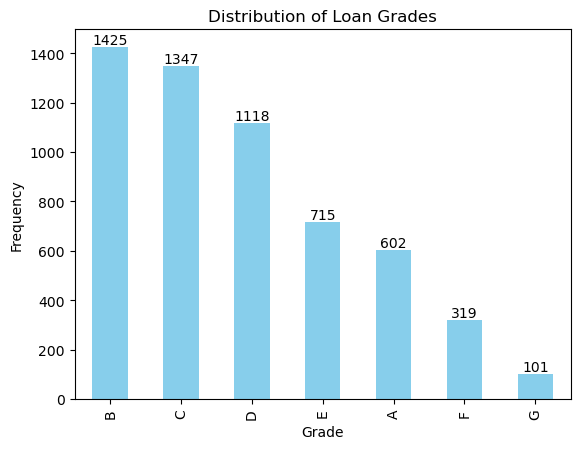

In [272]:
# Frequency count for `grade`
grade_counts = df[df['loan_status']=='Charged Off']['grade'].value_counts()

# Bar Plot
ax=grade_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Loan Grades")
plt.xlabel("Grade")
plt.ylabel("Frequency")
for i, v in enumerate(grade_counts.values):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')  # `+0.2` adjusts the position above the bar

plt.show()


In [270]:
df[df['loan_status']=='Charged Off']['grade'].value_counts()

grade
B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: count, dtype: int64

In [273]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,2015-01-01,171.62
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,2013-04-01,119.66
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,2014-06-01,649.91
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,2015-01-01,357.48
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0.00,2015-01-01,161.03


In [275]:
df[df['loan_status']=='Charged Off']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,1687,9.40%,4,1008.71,1008.71,456.46,435.17,0.00,2013-04-01,119.66
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,...,5210,32.60%,13,646.02,646.02,162.02,294.94,0.00,2012-04-01,152.39
9,5375,5375,5350.0,60,12.69,121.45,B,B5,0,RENT,...,9279,36.50%,3,1476.19,1469.34,673.48,533.42,0.00,2012-11-01,121.45
12,9000,9000,9000.0,36,13.49,305.38,C,C1,0,RENT,...,10452,91.70%,9,2270.70,2270.70,1256.14,570.26,0.00,2012-07-01,305.38
14,10000,10000,10000.0,36,10.65,325.74,B,B2,3,RENT,...,11997,55.50%,29,7471.99,7471.99,5433.47,1393.42,0.00,2013-10-01,325.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,2500,2500,675.0,36,12.80,84.00,D,D4,0,MORTGAGE,...,3408,35.10%,32,2220.61,599.28,1706.01,477.21,1.69,2010-03-01,1.76
39668,2500,2500,825.0,36,9.64,80.26,B,B4,0,MORTGAGE,...,269,3.80%,35,2086.63,688.35,1730.83,354.44,1.36,2010-03-01,1.40
39669,6500,6500,225.0,36,15.01,225.37,F,F1,9,MORTGAGE,...,56411,75.30%,28,4054.35,139.42,2886.21,1168.14,0.00,2009-02-01,225.37
39678,1000,1000,950.0,36,10.59,32.55,C,C2,2,MORTGAGE,...,4485,36.90%,11,703.95,668.87,544.02,138.64,0.00,2009-05-01,32.55


In [276]:
df.shape

(38577, 29)

In [277]:
loan_df=pd.read_csv('loan.csv')

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/2888986811.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df=pd.read_csv('loan.csv')


In [281]:
df['open_acc']=loan_df['open_acc']

/var/folders/_1/j7jqjd896yb00t516lkn5j280000gn/T/ipykernel_1426/713517817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open_acc']=loan_df['open_acc']


In [282]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'open_acc'],
      dtype='object')